# Snødybde

Datasettet `snodybde.xls` er lastet ned fra Norsk Klimaservicesenter https://seklima.met.no/ og inneholder observasjoner av snødybde målt på Biri i Gjøvik kommune vinteren 2019/2020. Vi har lagret filen som .xls fordi biblioteket xlrd (https://pypi.org/project/xlrd/) av sikkerhetshensyn ikke aksepterer .xlsx-filer. 

## Læringsmål: Kontinuerlige data

### Delmål

1. Lese inn .xls (excel) fil og gjøre seg kjent med et enkelt datasett
2. Regne ut oppsummerende tall
3. Plotte histogram og boksplott

*Hva er relevant for tellende vurdering? Erfaringen med å håndtere datasett i Python får du nytte av i den tellende prosjektoppgaven, og i resten av utdanningen din. Du skal ikke skrive kode selv på eksamen, men du må kunne lese, tolke og forklare utskrift og plott fra ulike statistikk-beregninger i Python.*

## Steg 1: Laste inn nødvendige python-moduler

Notebook-tips: Kjør koden som henter inn modulene ved å trykke på feltet under og deretter knappen "Run" øverst på kommandolinja, eller bruk tastatursnarveien cmd + enter.

In [6]:
import pandas as pd # lese data fra excel-fil og bruke DataFrames
import seaborn as sns # plotting
sns.set(style = 'whitegrid', font_scale = 1.5) # utseende av plott
import matplotlib.pyplot as plt # og mer plotting
import numpy as np # matematikk
import statistics as statistics  # statistikk-funksjoner

## Steg 2: Lese inn data

In [7]:
snodybde = pd.read_excel('https://www.math.ntnu.no/emner/IST100x/python_felles/snodybde.xls') # leser inn excel-fila
snodybde.shape # dimensjonen på datasettet

(181, 4)

In [3]:
snodybde # ser på de første og siste observasjonene

,Navn,Stasjon,Tid(norsk normaltid),Snødybde
0,Biri,SN11900,02.11.2019,0
1,Biri,SN11900,03.11.2019,0
2,Biri,SN11900,04.11.2019,0
3,Biri,SN11900,05.11.2019,0
4,Biri,SN11900,06.11.2019,0
...,...,...,...,...
176,Biri,SN11900,26.04.2020,0
177,Biri,SN11900,27.04.2020,0
178,Biri,SN11900,28.04.2020,0
179,Biri,SN11900,29.04.2020,0


## Steg 3: Regne ut oppsummerende tall

Python-tips: Hvordan kjenner vi til alle disse funksjonene? Det er rimelig å anta at de vanligste statistikkfunksjonene er ferdig kodet i en eller annen python-modul. Et raskt google-søk på "mean median and standard deviation in python" gir oss med en gang informasjon om modulen "statistics", og funksjonene i denne modulen kan man lese om her: https://docs.python.org/3/library/statistics.html

In [4]:
# Gjennomsnitt
statistics.mean(snodybde['Snødybde'])

31.34806629834254

In [6]:
# Standardavvik
statistics.stdev(snodybde['Snødybde'])

16.42949106928088

In [7]:
# Median
statistics.median(snodybde['Snødybde'])  # alternativ: np.quantile(snodybde['Snødybde'],0.5)

34.0

In [8]:
# Kvartilbredde
np.quantile(snodybde['Snødybde'], 0.75) - np.quantile(snodybde['Snødybde'], 0.25)

25.0

In [9]:
# Variasjonsbredde
max(snodybde['Snødybde']) - min(snodybde['Snødybde'])

61.0

## Steg 4: Tabell og histogram
Siden variasjonsbredden er på 61 cm ser vi det som rimelig å samle dataene i intervaller på 10 cm (fra 0 til og med 70 cm).

In [10]:
# Henter ut antall i hvert intervall
antall, intervaller = np.histogram(snodybde['Snødybde'],bins = range(0,80,10))

# Legger dataene i tabell
tabell = {'Intervaller' : ['[0-10 cm)','[10-20 cm)','[20-30 cm)','[30-40 cm)',
                         '[40-50 cm)','[50-60 cm)','[60-70 cm)'],
          'Antall dager' : antall}

# Lager en pandas DataFrame
tabelldf = pd.DataFrame(tabell, columns = ['Intervaller','Antall dager'])
tabelldf

,Intervaller,Antall dager
0,[0-10 cm),29
1,[10-20 cm),12
2,[20-30 cm),25
3,[30-40 cm),51
4,[40-50 cm),51
5,[50-60 cm),12
6,[60-70 cm),1


In [11]:
# Regner ut andeler

tabelldf['Andel dager'] = round(tabelldf['Antall dager']/sum(tabelldf['Antall dager']),3)
tabelldf

,Intervaller,Antall dager,Andel dager
0,[0-10 cm),29,0.160
1,[10-20 cm),12,0.066
2,[20-30 cm),25,0.138
3,[30-40 cm),51,0.282
4,[40-50 cm),51,0.282
5,[50-60 cm),12,0.066
6,[60-70 cm),1,0.006


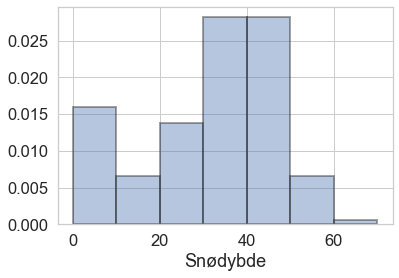

In [13]:
# Plotter et histogram av observasjonene (merk y-aksen! høyden på stolpene er justert slik at arealet av alle stolpene er 1)
sns.distplot(snodybde['Snødybde'], bins = range(0,80,10), 
             kde = False, hist_kws=dict(edgecolor="k", linewidth=2),
             norm_hist=True)



## Steg 5: Boksplott

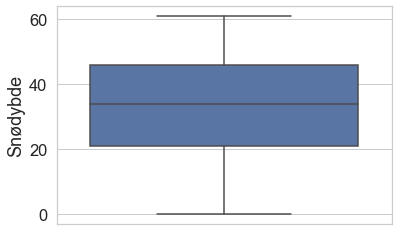

In [14]:
# Plotter et boksplott av observasjonene

sns.boxplot(y='Snødybde',data=snodybde)

